In [ ]:
# Sources:
# 

In [1]:
#!pip install cond-rnn
# Explanation of the method:
# https://datascience.stackexchange.com/questions/17099/adding-features-to-time-series-model-lstm/17139#17139

In [2]:
from tensorflow.keras import Input
from tensorflow.keras.layers import LSTM

from cond_rnn import ConditionalRecurrent

time_steps, input_dim, output_dim, batch_size, cond_size = 128, 6, 12, 32, 5
inputs = Input(batch_input_shape=(batch_size, time_steps, input_dim))
cond_inputs = Input(batch_input_shape=(batch_size, cond_size))

outputs = ConditionalRecurrent(LSTM(units=output_dim))([inputs, cond_inputs])
print(outputs.shape)  # (batch_size, output_dim)

(32, 12)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
rate = pd.read_csv('MORTGAGE30US.csv')
rate['DATE'] = rate['DATE'].astype('datetime64[ns]')
rate['Year'] = rate['DATE'].dt.year
rate['Month'] = rate['DATE'].dt.month

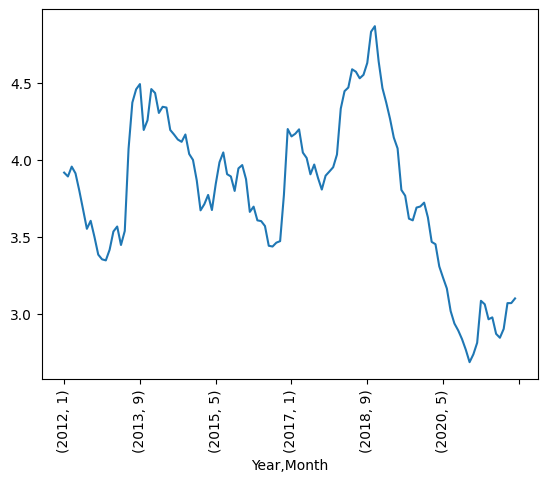

In [23]:
rate.loc[(rate['Year']>2011) & (rate['Year']<2022)].groupby(['Year', 'Month'])['MORTGAGE30US'].mean().plot(kind='line', rot=90)
plt.show()

In [27]:
!ls

help  historical_data_2012Q1.txt  MORTGAGE30US.csv  sample_data


In [28]:
df = pd.read_csv('historical_data_2012Q1.txt', sep='|', header=None, low_memory=False)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,784,201203,N,204202,NaN,0,1,P,102,999,...,1,Other sellers,Other servicers,NaN,F08Q40000005,9,Y,9,N,9
1,813,201203,N,204202,NaN,0,1,P,105,999,...,1,Other sellers,Other servicers,NaN,F07Q40002639,9,Y,9,N,9
2,773,201205,N,202704,NaN,0,1,S,19,34,...,2,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9
3,783,201204,N,203203,16974.0,0,1,P,61,999,...,2,Other sellers,Other servicers,NaN,F09Q10002401,9,Y,9,N,9
4,779,201204,N,202703,17860.0,0,1,P,38,16,...,1,Other sellers,Other servicers,NaN,NaN,9,NaN,9,N,9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414772 entries, 0 to 414771
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       414772 non-null  int64  
 1   1       414772 non-null  int64  
 2   2       414772 non-null  object 
 3   3       414772 non-null  int64  
 4   4       334901 non-null  float64
 5   5       414772 non-null  int64  
 6   6       414772 non-null  int64  
 7   7       414772 non-null  object 
 8   8       414772 non-null  int64  
 9   9       414772 non-null  int64  
 10  10      414772 non-null  int64  
 11  11      414772 non-null  int64  
 12  12      414772 non-null  float64
 13  13      414772 non-null  object 
 14  14      414772 non-null  object 
 15  15      414772 non-null  object 
 16  16      414772 non-null  object 
 17  17      414772 non-null  object 
 18  18      414772 non-null  int64  
 19  19      414772 non-null  object 
 20  20      414772 non-null  object 
 21  21      41

In [ ]:
svcgdata = pd.read_csv('EDA_samples/unprocessed_consolidated_sample_svcg_file.csv', delimiter=",", header=None,
                       index_col=False,
                       names=["LoanSequenceNumber", "MonthlyReportingPeriod",
                              "CurrentActualUPB", "CurrentLonDeliquencyStatus",
                              "LoanAge", "RemainingMonthsForLegalMaturity",
                              "RepurchaseFlag", "ModificationFlag",
                              "ZeroBalanceCode", "ZeroBalanceEffectiveDate",
                              "CurrentInterestRate", "CurrentDeferredUPB",
                              "DDLPI", "MIRecoveries", "NetSalesProceeds",
                              "NonMIRecoveries", "Expenses", "LegalCosts",
                              "MaintenanceAndPreservationCosts", "TaxesAndInsurance",
                              "MiscellaneousExpenses", "ActualLossCalculation",
                              "ModificationCost"])